<a href="https://colab.research.google.com/github/BrainyHaron/DB-NSK/blob/Brainy's_Projects/broken_photos_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive #import from  google disk
drive.mount('/content/drive')
path_all='/content/drive/MyDrive/Nature_park_photos/train_dataset_altai/new_all'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path_train='/content/drive/MyDrive/Nature_park_photos/train_dataset_altai/imgs_defect_normal'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path1='/content/drive/MyDrive/Nature_park_photos/train_dataset_altai/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path_pic='/content/drive/MyDrive/Nature_park_photos/train_dataset_altai/pic/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import necessary modules

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import os
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [ ]:
# @title Pre trained _ Модель определения  Размытия _ - применение на датасете из 323 фото размеченных


In [ ]:
trained_model = load_model(path1+'/blur_detect.h5')
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
source_dir = path_train
pred = []
score = []
pred1 = []
for i in os.listdir(source_dir):
    img = tf.keras.preprocessing.image.load_img(source_dir+'/'+i,target_size = (128,128))
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    classes = trained_model.predict(x/255) #255 IS RGB :)
    pred.append(img)
    score.append(classes)
    if classes[0][0]<0.5: # результаты по разымтию , можно сказать что 50% достаточно, потому
        pred1.append("Размытие") # что такие фото как 305&302 их можно было не отсекать сразу как размытие, что показала модель
    else:
        pred1.append("Чистый")

1/1 [==============================] - 0s 54ms/step


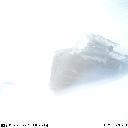

In [ ]:
pred[0]  #Пример на нескольких фото

In [ ]:
print(score[0],pred1[0]) #Модель определила оценку и дала заключение - РАЗМЫТИЕ

[[1.3224753e-05]] Размытие


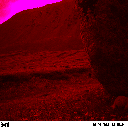

In [ ]:
pred[35] #Пример 2

In [ ]:
print(score[35],pred1[35])

[[0.99978703]] Чистый


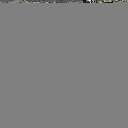

In [ ]:
pred[40] #Пример 3

In [ ]:
print(score[40],pred1[40]) #Определяет сломанные как размытие

[[0.49691343]] Размытие


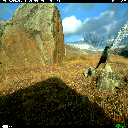

In [ ]:
pred[310] # Пример 4 - хорошая фото

In [ ]:
print(score[310],pred1[310]) # Правильное определение

[[0.99876726]] Чистый


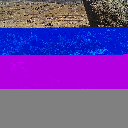

In [ ]:
pred[270] #Пример 5 - сломан

In [ ]:
print(score[270],pred1[270]) # Нет размытия +

[[0.9466222]] Чистый


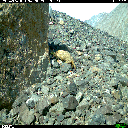

In [ ]:
pred[300] #Пример 6 - чистый

In [ ]:
print(score[300],pred1[300])

[[0.9977453]] Чистый


In [ ]:
# @title Pre trained _ модель Определения Вспышки _  - применение на датасете из 323 фото размеченных

In [ ]:
#функция оптимизирующая изображение и определяющее есть/нет вспышка
glareCNN = tf.keras.models.load_model(path1+'/glare_detect.h5')
def glare(img_path,img_name):
    test_image1 = image.load_img(str(img_path)+str(img_name), target_size = (64,64)) #размер который разрешен моделью
    test_image2 = image.img_to_array(test_image1)
    test_image2 = np.expand_dims(test_image2, axis = 0) #увелич-е размерности матрицы чтобы подошло на input
    result = glareCNN.predict(test_image2/255) #это  RGB :)
    return test_image1,result

In [ ]:
#оценка ДАЛЕЕ СНИЖЕНА до 0.04! т.к. на примере чистых видно  что в ночное время животные тоже светлыеа вспышка дает оценку в среднем случае равную 1%
def predd(score):
    pred_class = ""
    if score[0][0] <0.2: #снижена до 0,2, 303(из Пр1) и некоторые др. были определены как вспышка при большей границе
        pred_class = "Вспышка"
    else:
        pred_class = "Чистый"
    return pred_class

1/1 [==============================] - 0s 104ms/step


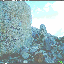

In [ ]:
img_path = path_train +'/' #Пример 1 на размытом
img = 'blurred_303.jpg'
image_calc,result = glare(img_path,img)
classification = predd(result)
image_calc

In [ ]:
print(result, classification) #нет  вспышек +

[[0.286959]] Чистый


Введите_наименование:broken_35
1/1 [==============================] - 0s 25ms/step


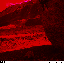

In [ ]:
img_path = path_train +'/' #Пример 2 на сломанном(?)
img = str(input('Введите_наименование:')) +'.JPG'
image_calc,result = glare(img_path,img)
classification = predd(result)
image_calc

In [ ]:
print(result, classification)
#определяет как вспышка ! -это при 50% границы оценки (после того как снизили до 0.2, здесь больше не определит как вспышка)

[[0.26838505]] Вспышка


Введите_наименование:clear_25
1/1 [==============================] - 0s 91ms/step


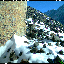

In [ ]:
img_path = path_train +'/' #Пример 3 на чистом
img = str(input('Введите_наименование:')) +'.JPG'
image_calc,result = glare(img_path,img)
classification = predd(result)
image_calc

In [ ]:
print(result, classification) #определяет правильно

[[0.91154325]] Чистый


Введите_наименование:broken_36
1/1 [==============================] - 0s 44ms/step


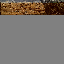

In [ ]:
img_path = path_train +'/' #Пример 4 на на сломанном
img = str(input('Введите_наименование:')) +'.JPG'
image_calc,result = glare(img_path,img)
classification = predd(result)
image_calc

In [ ]:
print(result, classification) #Нет вспышки  +

[[0.941476]] Чистый


Введите_наименование:blurred_321
1/1 [==============================] - 0s 37ms/step


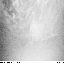

In [ ]:
img_path = path_train +'/' #Пример 5 на размытом
img = str(input('Введите_наименование:')) +'.JPG'
image_calc,result = glare(img_path,img)
classification = predd(result)
image_calc

In [ ]:
print(result, classification)#определяет правильно

[[0.00747741]] Вспышка


Введите_наименование:clear_5
1/1 [==============================] - 0s 25ms/step


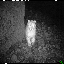

In [ ]:
img_path = path_train +'/' #Пример 6 на чистом и светлом!
img = str(input('Введите_наименование:')) +'.JPG'
image_calc,result = glare(img_path,img)
classification = predd(result)
image_calc

In [ ]:
print(result, classification) #при снижении границы до 4% стал определять  правильно

[[0.07925504]] Чистый


In [ ]:
#Применение на всех 323 фото - ВСПЫШКА

lstclassification1 = []
stclass = []
lstpredictions = []
from PIL import ImageFile
import pandas as pd

glareCNN = tf.keras.models.load_model(path1+'/glare_detect.h5')
def glare(img_path,img_name):
    # test_image1 = image.load_img(str(img_path)+str(img_name), target_size = (64,64))
    # test_image2 = image.img_to_array(test_image1)
    # test_image2 = np.expand_dims(test_image2, axis = 0)
    # result = glareCNN.predict(test_image2/255)
    # return test_image1,result


    test_image1 = tf.keras.preprocessing.image.load_img(str(img_path)+str(img_name),target_size = (64,64))
    test_image2 = tf.keras.preprocessing.image.img_to_array(test_image1)
    test_image2 = np.expand_dims(test_image2, axis = 0)
    result = glareCNN.predict(test_image2/255)
    return test_image1,result

i=0
def predd(score):
    pred_class = ""
    if score[0][0] <0.04: #снижен до 0.04 т.к.  на примере чистых видно  что в ночное время животные тоже светлыеа вспышка дает оценку в среднем случае равную 1%
        pred_class = "1"
    else:
        pred_class = "0"
    return pred_class


grade = {'Вспышка':[], 'Оценка': [], 'Наименование': []}



for i in range(0,(len(os.listdir(path_train)))):

    df2,df1 = glare(path_train+'/',os.listdir(path_train)[i])
    #i=i+1
    lstclassification = predd(df1)

    grade['Вспышка'].append(lstclassification)
    grade['Оценка'].append(df1)
    grade['Наименование'].append(str(os.listdir(path_train)[i]).lower())
    df_glare = pd.DataFrame(grade, columns = ['Вспышка','Оценка','Наименование'])


1/1 [==============================] - 0s 41ms/step


In [ ]:
df_glare = df_glare.rename(columns={'Вспышка': 'glare', 'Оценка': 'Score_glare', 'Наименование': 'filename'})
df_glare

,glare,Score_glare,filename
0,1,[[0.0004077721]],blurred_306.jpg
1,1,[[0.00018851773]],blurred_308.jpg
2,1,[[0.0001652185]],blurred_301.jpg
3,0,[[0.92195123]],blurred_304.jpg
4,0,[[0.286959]],blurred_303.jpg
...,...,...,...
318,0,[[0.079255044]],clear_5.jpg
319,0,[[0.8832245]],clear_8.jpg
320,0,[[0.9913636]],clear_9.jpg
321,0,[[0.94995403]],clear_7.jpg


import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_glare, *['glare'], **{})
chart

In [ ]:
#Применение на всех 323 фото - РАЗМЫТИЕ


total_2 = {'Размытие':[], 'Оценка': [], 'Наименование': []}
trained_model = load_model(path1+'/blur_detect.h5')
from PIL import ImageFile
import pandas as pd
pred = []

pred2=[]
score = []
k=0

source_dir = path_train
for i in range(0,(len(os.listdir(path_train)))):
    img = tf.keras.preprocessing.image.load_img(source_dir+'/'+os.listdir(path_train)[i],target_size = (128,128))
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    classes = trained_model.predict(x/255) #255 IS RGB :)
    classes2=np.array(classes)
    pred.append(img)
    score.append(classes)
    if classes[0][0]<0.5:
        pred1="1"
        total_2['Размытие'].append(pred1)
        total_2['Оценка'].append(np.squeeze(classes2,axis=1))
        total_2['Наименование'].append(str(os.listdir(path_train)[i]).lower())
        k+=1
    else:
        pred1="0"
        total_2['Размытие'].append(pred1)
        #k+=1
        total_2['Оценка'].append(np.squeeze(classes2,axis=1))
        total_2['Наименование'].append(str(os.listdir(path_train)[i]).lower())



df_blur = pd.DataFrame(total_2, columns = ['Размытие','Оценка','Наименование'])

1/1 [==============================] - 0s 52ms/step


In [ ]:
#Все 27 чистые правильно определены  моделью! (см датафрейм)
#Некоторые из  размеченных как "размытые"- определены как чистые,что подтверждает, то
#что предварительный анализ может  быть с ошибками (размеченный вручную) - (например номера 302, 303, 305)
df_blur = df_blur.rename(columns={'Размытие': 'blur', 'Оценка': 'Score_blur','Наименование': 'filename'})
df_blur

,blur,Score_blur,filename
0,1,[1.3224753e-05],blurred_306.jpg
1,1,[1.157278e-05],blurred_308.jpg
2,1,[1.2778502e-05],blurred_301.jpg
3,0,[0.999996],blurred_304.jpg
4,0,[0.8973657],blurred_303.jpg
...,...,...,...
318,0,[0.97468674],clear_5.jpg
319,0,[0.9969984],clear_8.jpg
320,0,[0.9999994],clear_9.jpg
321,0,[0.9999188],clear_7.jpg


In [ ]:
#Применение на всех 323 фото - ТЕМНО

classification_dark=''
from PIL import ImageFile
import pandas as pd

import cv2
import sys
import numpy as np
directory = path_train
i=0
grade3 = {'Темно':[], 'Оценка': [], 'Наименование': []}
for pic in os.listdir(directory):

    im = cv2.imread(path_train+'/'+pic, cv2.IMREAD_GRAYSCALE)

    meanpercent = np.mean(im) * 100 / 255  # средний уровень яркости
    if meanpercent < 11: # исправлен на 11% на примере размеченных как чистые
      classification_dark = "1"
      grade3['Темно'].append(classification_dark)
      grade3['Оценка'].append(meanpercent)
      grade3['Наименование'].append(str(os.listdir(path_train)[i]).lower())
      i+=1
    else:
      classification_dark = "0"
      grade3['Темно'].append(classification_dark)
      grade3['Оценка'].append(meanpercent)
      grade3['Наименование'].append(str(os.listdir(path_train)[i]).lower())
      i+=1

df_dark = pd.DataFrame(grade3, columns = ['Темно','Оценка','Наименование'])



In [ ]:

df_dark= df_dark.rename(columns={'Оценка': 'Score_dark','Темно': 'dark','Наименование': 'filename'})
df_dark.tail(50)
#Пример 302,315 чистый по двум и тут отмечен темным=некачественная фото + (Анализ дополнен)

,dark,Score_dark,filename
273,0,11.962945,broken_81.jpg
274,1,10.012484,broken_82.jpg
275,1,9.501191,broken_84.jpg
276,0,17.276034,broken_80.jpg
277,0,11.487068,broken_79.jpg
278,0,49.263645,broken_78.jpg
279,0,12.159188,broken_83.jpg
280,0,50.105363,broken_77.jpg
281,0,55.876486,broken_86.jpg
282,0,54.947800,broken_85.jpg


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Score_dark'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['Score_dark'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_2, *['dark'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_3, *['Score_dark', 'dark'], **{'inner': 'stick'})
chart

In [ ]:
df_final = df_blur.copy() #save  copy

In [ ]:
#merge
df_final=df_final.merge(df_dark,right_on='filename', left_on='filename')
column_to_add=df_final["filename"]
df_final

,blur,Score_blur,filename,dark,Score_dark
0,1,[1.3224753e-05],blurred_306.jpg,0,96.104559
1,1,[1.157278e-05],blurred_308.jpg,0,98.505253
2,1,[1.2778502e-05],blurred_301.jpg,0,98.970616
3,0,[0.999996],blurred_304.jpg,0,52.252015
4,0,[0.8973657],blurred_303.jpg,0,67.238438
...,...,...,...,...,...
318,0,[0.97468674],clear_5.jpg,0,23.203931
319,0,[0.9969984],clear_8.jpg,0,40.917151
320,0,[0.9999994],clear_9.jpg,0,55.025945
321,0,[0.9999188],clear_7.jpg,0,40.960323


In [ ]:
#moving column
column_to_move = df_final.pop("filename")
df_final

,blur,Score_blur,dark,Score_dark
0,1,[1.3224753e-05],0,96.104559
1,1,[1.157278e-05],0,98.505253
2,1,[1.2778502e-05],0,98.970616
3,0,[0.999996],0,52.252015
4,0,[0.8973657],0,67.238438
...,...,...,...,...
318,0,[0.97468674],0,23.203931
319,0,[0.9969984],0,40.917151
320,0,[0.9999994],0,55.025945
321,0,[0.9999188],0,40.960323


In [ ]:
df_final.insert(4, 'filename',column_to_add)

In [ ]:
df_final

,blur,Score_blur,dark,Score_dark,filename
0,1,[1.3224753e-05],0,96.104559,blurred_306.jpg
1,1,[1.157278e-05],0,98.505253,blurred_308.jpg
2,1,[1.2778502e-05],0,98.970616,blurred_301.jpg
3,0,[0.999996],0,52.252015,blurred_304.jpg
4,0,[0.8973657],0,67.238438,blurred_303.jpg
...,...,...,...,...,...
318,0,[0.97468674],0,23.203931,clear_5.jpg
319,0,[0.9969984],0,40.917151,clear_8.jpg
320,0,[0.9999994],0,55.025945,clear_9.jpg
321,0,[0.9999188],0,40.960323,clear_7.jpg


In [ ]:
dt= df_final.copy()

In [ ]:
#merge all
dt=df_final2.merge(df_glare,right_on='filename',left_on='filename')

In [ ]:
dt

,blur,Score_blur,dark,Score_dark,filename,glare,Score_glare
0,1,[1.3224753e-05],0,96.104559,blurred_306.jpg,1,[[0.0004077721]]
1,1,[1.157278e-05],0,98.505253,blurred_308.jpg,1,[[0.00018851773]]
2,1,[1.2778502e-05],0,98.970616,blurred_301.jpg,1,[[0.0001652185]]
3,0,[0.999996],0,52.252015,blurred_304.jpg,0,[[0.92195123]]
4,0,[0.8973657],0,67.238438,blurred_303.jpg,0,[[0.286959]]
...,...,...,...,...,...,...,...
318,0,[0.97468674],0,23.203931,clear_5.jpg,0,[[0.079255044]]
319,0,[0.9969984],0,40.917151,clear_8.jpg,0,[[0.8832245]]
320,0,[0.9999994],0,55.025945,clear_9.jpg,0,[[0.9913636]]
321,0,[0.9999188],0,40.960323,clear_7.jpg,0,[[0.94995403]]


In [ ]:
# add broken при условии что хотя бы один брак
import numpy as np
dt['broken'] = np.where((dt['blur'] == '1') | (dt['glare'] == '1') | (dt['dark'] == '1'), 1, 0)
dt

,blur,Score_blur,dark,Score_dark,filename,glare,Score_glare,broken
0,1,[1.3224753e-05],0,96.104559,blurred_306.jpg,1,[[0.0004077721]],1
1,1,[1.157278e-05],0,98.505253,blurred_308.jpg,1,[[0.00018851773]],1
2,1,[1.2778502e-05],0,98.970616,blurred_301.jpg,1,[[0.0001652185]],1
3,0,[0.999996],0,52.252015,blurred_304.jpg,0,[[0.92195123]],0
4,0,[0.8973657],0,67.238438,blurred_303.jpg,0,[[0.286959]],0
...,...,...,...,...,...,...,...,...
318,0,[0.97468674],0,23.203931,clear_5.jpg,0,[[0.079255044]],0
319,0,[0.9969984],0,40.917151,clear_8.jpg,0,[[0.8832245]],0
320,0,[0.9999994],0,55.025945,clear_9.jpg,0,[[0.9913636]],0
321,0,[0.9999188],0,40.960323,clear_7.jpg,0,[[0.94995403]],0


In [ ]:
data = dt.pop('blur')
data = dt.pop('dark')
data = dt.pop('Score_blur')
data = dt.pop('Score_dark')
data = dt.pop('glare')
data = dt.pop('Score_glare')

0       [[0.0004077721]]
1      [[0.00018851773]]
2       [[0.0001652185]]
3         [[0.92195123]]
4           [[0.286959]]
             ...        
318      [[0.079255044]]
319        [[0.8832245]]
320        [[0.9913636]]
321       [[0.94995403]]
322       [[0.94043326]]
Name: Score_glare, Length: 323, dtype: object

In [ ]:
dt = dt.set_index('filename')
dt

,broken
filename,
blurred_306.jpg,1
blurred_308.jpg,1
blurred_301.jpg,1
blurred_304.jpg,0
blurred_303.jpg,0
...,...
clear_5.jpg,0
clear_8.jpg,0
clear_9.jpg,0


In [ ]:
dt.to_csv('dataset_altai.csv', sep=',')

In [ ]:

from google.colab import files
files.download('dataset_altai.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>